In [1]:
import numpy
import scipy.special #sigmoid function expit()
import matplotlib.pyplot #plotting arrays
%matplotlib inline

In [2]:
#definição da classe Rede Neural
class NeuralNet:
    
    #inicializar a rede
    def __init__(self, inputN, hiddenN, outputN, learningR):
        
        #Configurar o numero de nós em cada camada
        self.inodes = inputN
        self.hnodes = hiddenN
        self.onodes = outputN
        
        #taxa de aprendizado
        self.lr = learningR
        
        #WEIGHTS
        #Random weights from a normal probability distribution centred on zero
        #standard deviation = 1/srqt(incoming links)
        
        #numpy.random.normal(mean, spread, shape)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #ACTIVATION FUNCTION
        self.activation_function = lambda x : scipy.special.expit(x)
        
        pass
    
    #treinar a rede
    def train(self, inputs_list, targets_list):
        #convertere para array2d numpy
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #PROPAGATION
        #signals hiddenl
        hi = numpy.dot(self.wih, inputs) #hidden inputs
        ho = self.activation_function(hi) #hidden outputs
        
        #signals outputL
        oi = numpy.dot(self.who, ho) #final inputs
        oo = self.activation_function(oi) #final outputs
        
        #BACKpropagation
        #ERRORS
        output_errors = targets - oo #error = (target - actual)
        hidden_errors = numpy.dot(self.who.T, output_errors) #ErrorsH = who.T dot errorsOut
        
        #UPDATING WEIGHTS
        self.who += self.lr * numpy.dot((output_errors * oo * (1.0 - oo)), numpy.transpose(ho))
        self.wih += self.lr * numpy.dot((hidden_errors * ho * (1.0 - ho)), numpy.transpose(inputs))
        pass
    
    #resposta depois de treinada
    def query(self, inputs_list):
        
        #Convertendo inputs para Array2d
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #INPUT --> HIDDEN
        #Hidden input calculation
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #Hidden outputs (activation function)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #HIDDEN --> OUTPUT
        #signals into the final layer (output layer)
        output_inputs = numpy.dot(self.who, hidden_outputs)
        #signals out the final layer (output layer)
        output_outputs = self.activation_function(output_inputs)
        
        return output_outputs

In [3]:
#MNIST NUMBERS Creating instance of the NN
#INPUTS (Every pixel 28x28), hidden, output (10 possible numbers)
inputl = 784
hiddenl = 100
outl = 10

learningrate = 0.3

nn = NeuralNet(inputl, hiddenl, outl, learningrate)

In [9]:
#LOADING THE DATA
training_data_arq = open("mnist/mnist_train.csv", "r")
training_data_lista = training_data_arq.readlines()
training_data_arq.close()

In [10]:
#PREPARING THE DATA and TRAINING THE NN
for record in training_data_lista:
    all_values = record.split(',') #separando a string atual pelas virgulas
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #scaling the inputs
    target = numpy.zeros(outl) + 0.01 #criando o target 0.01-0.99
    target[int(all_values[0])] = 0.99 #target label
    
    nn.train(inputs, target)
    pass


In [11]:
# --TESTING THE NETWORK--
#loading the mnist testing data
test_df = open("mnist/mnist_test_10.csv", "r")
test_l = test_df.readlines()
test_df.close()

1


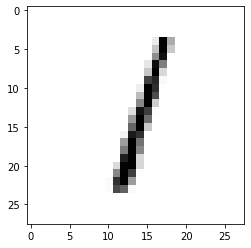

In [19]:
#testando a primeiro entrada
all_values = test_l[2].split(',')
print(all_values[0])

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys', interpolation='None')

In [21]:
test = nn.query((numpy.asfarray(all_values[1:]) / 255.00 * 0.99) + 0.01)
for i in range(10):
    print("Number", i ,":", test[i])

Number 0 : [0.00151465]
Number 1 : [0.99606403]
Number 2 : [0.00205776]
Number 3 : [0.00076712]
Number 4 : [0.01055196]
Number 5 : [0.00613062]
Number 6 : [0.00089838]
Number 7 : [0.00625888]
Number 8 : [0.00101362]
Number 9 : [0.00466113]
